# EMAIL-SPAM DETECTION

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
msg = pd.read_csv('messages.csv',encoding='latin-1')
msg.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [3]:
print ('Shape =>',msg.shape)

Shape => (2893, 3)


In [4]:
#Show the number of missing (NAN, NaN, na) data for each column
msg.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [5]:
# Adding Missing values

# FillingNA in subject column
msg['subject'].fillna('', inplace=True)

In [6]:
msg.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [7]:
# Count
msg.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [8]:
# Combining the 2 columns
msg["text"] = msg[["subject", "message"]].apply(lambda x: ' '.join(x), axis=1)
msg.drop(["subject", "message"], axis=1)

label                                               text
0         0  job posting - apple-iss research center conten...
1         0   lang classification grimes , joseph e . and b...
2         0  query : letter frequencies for text identifica...
3         0  risk a colleague and i are researching the dif...
4         0  request book information earlier this morning ...
...     ...                                                ...
2888      1  love your profile - ysuolvpv hello thanks for ...
2889      1  you have been asked to join kiddin the list ow...
2890      0  anglicization of composers ' names judging fro...
2891      0  re : 6 . 797 , comparative method : n - ary co...
2892      0  re : american - english in australia hello ! i...

[2893 rows x 2 columns]

## 1. Data Preparation

In [9]:
raw_data = msg['text']
raw_data

0       job posting - apple-iss research center conten...
1        lang classification grimes , joseph e . and b...
2       query : letter frequencies for text identifica...
3       risk a colleague and i are researching the dif...
4       request book information earlier this morning ...
                              ...                        
2888    love your profile - ysuolvpv hello thanks for ...
2889    you have been asked to join kiddin the list ow...
2890    anglicization of composers ' names judging fro...
2891    re : 6 . 797 , comparative method : n - ary co...
2892    re : american - english in australia hello ! i...
Name: text, Length: 2893, dtype: object

In [10]:
# Replace email addresses with 'email'
new_data = raw_data.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
new_data = new_data.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
new_data = new_data.str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
new_data = new_data.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

# Replace numbers with 'numbr'
new_data = new_data.str.replace(r'\d+(\.\d+)?', 'numbr')

In [11]:

# Remove punctuation
new_data = new_data.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
new_data = new_data.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
new_data = new_data.str.replace(r'^\s+|\s+?$', '')

In [12]:
# Converting all the words to the lower cases
new_data = new_data.str.lower()

In [13]:
# Remove stopwords

import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure', 'n', 'us', 'iss','g','p', 'w', 'j', 'r', 'e', 'x', 'sg', 'ix', 'f'])

new_data = new_data.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

## 2. Creating word dictionary

In [14]:
# Message Frequency

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in doc.lower().split() if word not in string.punctuation if word not in stop_words]
         for doc in new_data]

# Count word frequencies
from collections import defaultdict

frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

In [15]:
texts

[['job',
  'posting',
  'apple',
  'research',
  'center',
  'content',
  'length',
  'numbr',
  'apple',
  'research',
  'center',
  'dollers',
  'numbr',
  'million',
  'joint',
  'venture',
  'apple',
  'computer',
  'inc',
  'institute',
  'systems',
  'science',
  'national',
  'university',
  'singapore',
  'located',
  'singapore',
  'looking',
  'senior',
  'speech',
  'scientist',
  'successful',
  'candidate',
  'research',
  'expertise',
  'computational',
  'linguistics',
  'including',
  'natural',
  'language',
  'processing',
  'english',
  'chinese',
  'statistical',
  'language',
  'modeling',
  'knowledge',
  'state',
  'art',
  'corpus',
  'based',
  'gram',
  'language',
  'models',
  'cache',
  'language',
  'models',
  'part',
  'speech',
  'language',
  'models',
  'required',
  'text',
  'speech',
  'project',
  'leader',
  'successful',
  'candidate',
  'research',
  'expertise',
  'expertise',
  'two',
  'following',
  'areas',
  'computational',
  'linguistic

In [16]:
frequency

defaultdict(int,
            {'job': 209,
             'posting': 133,
             'apple': 31,
             'research': 1814,
             'center': 344,
             'content': 312,
             'length': 313,
             'numbr': 75639,
             'dollers': 5926,
             'million': 289,
             'joint': 67,
             'venture': 17,
             'computer': 918,
             'inc': 222,
             'institute': 641,
             'systems': 985,
             'science': 826,
             'national': 405,
             'university': 6335,
             'singapore': 122,
             'located': 90,
             'looking': 285,
             'senior': 52,
             'speech': 1147,
             'scientist': 12,
             'successful': 169,
             'candidate': 75,
             'expertise': 46,
             'computational': 594,
             'linguistics': 3373,
             'including': 853,
             'natural': 627,
             'language': 6461,
            

In [17]:
len(frequency)

55140

In [18]:
for item in frequency.copy():
    if item.isalpha() == False:
        del frequency[item]
    elif len(item) <= 1:
        del frequency[item]

In [19]:
len(frequency)

55132

In [20]:
# Stemming

porter = nltk.PorterStemmer()
new_data = new_data.apply(lambda x: ' '.join(porter.stem(term) for term in x.split()))

## 3. Feature Extraction

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_ngrams = vectorizer.fit_transform(new_data)

In [23]:
X_ngrams.shape

(2893, 451024)

In [24]:
y = msg['label']

In [25]:
# Importing the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Train and predict
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_ngrams,y,test_size=0.33,random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is 0.9504643962848297
Accuracy_score: 0.9036649214659686
Confusion Matrix : 
 [[773   0]
 [ 92  90]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       773
           1       1.00      0.49      0.66       182

    accuracy                           0.90       955
   macro avg       0.95      0.75      0.80       955
weighted avg       0.91      0.90      0.89       955

F1 Score:  90.37


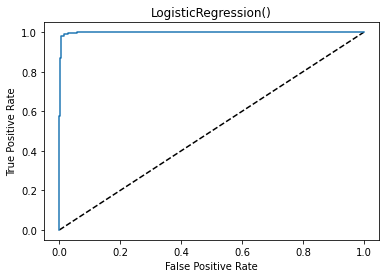

ROC_AUC Score:  0.7472527472527473

*************** KNeighborsClassifier() Model ***************

Score of KNeighborsClassifier() Model is 0.9711042311661506
Accuracy_score: 0.949738219895288
Confusion Matrix : 
 [[753  20]
 [ 28 154]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       773
           1       0.89      0.85      0.87       182

    accuracy                           0.95       955
   macro avg       0.92      0.91      0.92       955
weighted avg       0.95      0.95      0.95       955

F1 Score:  94.97


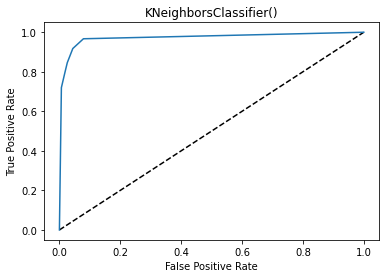

ROC_AUC Score:  0.9101403124689024

*************** MultinomialNB() Model ***************

Score of MultinomialNB() Model is 0.8617131062951496
Accuracy_score: 0.8146596858638744
Confusion Matrix : 
 [[773   0]
 [177   5]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       773
           1       1.00      0.03      0.05       182

    accuracy                           0.81       955
   macro avg       0.91      0.51      0.48       955
weighted avg       0.85      0.81      0.74       955

F1 Score:  81.47


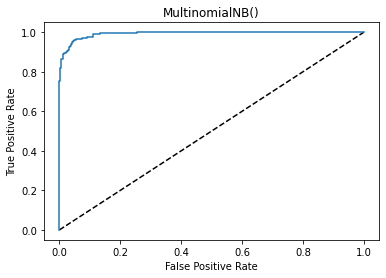

ROC_AUC Score:  0.5137362637362637

*************** DecisionTreeClassifier() Model ***************

Score of DecisionTreeClassifier() Model is 1.0
Accuracy_score: 0.9570680628272251
Confusion Matrix : 
 [[758  15]
 [ 26 156]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       773
           1       0.91      0.86      0.88       182

    accuracy                           0.96       955
   macro avg       0.94      0.92      0.93       955
weighted avg       0.96      0.96      0.96       955

F1 Score:  95.71


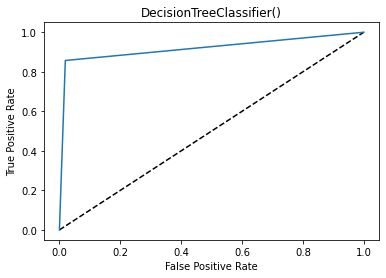

ROC_AUC Score:  0.9188689706154131


In [28]:
model = [LogisticRegression(), KNeighborsClassifier(), MultinomialNB(), DecisionTreeClassifier()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('Accuracy_score: %s' % (accuracy_score(y_test, predm)))
    print('Confusion Matrix : \n', confusion_matrix(y_test, predm))
    print('\nClassification Report : \n', classification_report(y_test, predm))
    print('F1 Score: ',round(f1_score(y_test, predm, average='micro')*100,2))
    
    # AUC_ROC Curve and finding auc score

    y_pred_prob = m.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0,1], 'k--')
    plt.plot(fpr, tpr, label='%s' % m)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s' % m)
    plt.show()

    print('ROC_AUC Score: ', roc_auc_score(y_test, predm))


*************** LinearSVC() Model ***************

Score of LinearSVC() Model is 1.0
Accuracy_score: 0.9738219895287958
Confusion Matrix : 
 [[771   2]
 [ 23 159]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       773
           1       0.99      0.87      0.93       182

    accuracy                           0.97       955
   macro avg       0.98      0.94      0.96       955
weighted avg       0.97      0.97      0.97       955

F1 Score:  97.38


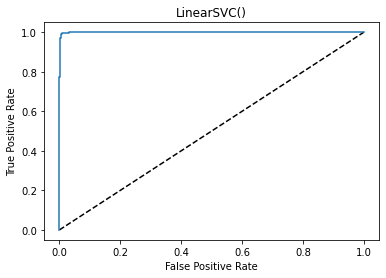

ROC_AUC Score:  0.9355195257523847


In [29]:
m = LinearSVC()
print('\n*************** %s Model ***************\n' % m)
m.fit(x_train, y_train)
print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
predm = m.predict(x_test)
print('Accuracy_score: %s' % (accuracy_score(y_test, predm)))
print('Confusion Matrix : \n', confusion_matrix(y_test, predm))
print('\nClassification Report : \n', classification_report(y_test, predm))
print('F1 Score: ',round(f1_score(y_test, predm, average='micro')*100,2))
    
# AUC_ROC Curve and finding auc score

y_pred_prob = m._predict_proba_lr(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr, label='%s' % m)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s' % m)
plt.show()

print('ROC_AUC Score: ', roc_auc_score(y_test, predm))

##### LinearSVC() & DecisionTreeClassifier() gives the best F1 score and ROC_AUC Score